# Introduction to Programming and Numerical Analysis - Exam

This is the exam project of the group ABS - måske indsæt eksamensnumre her?

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Human Capital Accumulation

# 2. AS-AD Model

# 3. Exchange Economy

The **parameters** and **random preferences and endowments** are given by (cf. exam assignment text):

In [30]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

**Question 2:** Plot the excess demand functions.

In [25]:
# Define demand functions
def demand_good_1(betas,alphas,p1,p2,p3,e1,e2,e3):
    I = p1*e1 + p2*e2 + p3*e3
    return betas*I/p1

def demand_good_2(betas,alphas,p1,p2,p3,e1,e2,e3):
    I = p1*e1 + p2*e2 + p3*e3
    return betas*I/p2

def demand_good_3(betas,alphas,p1,p2,p3,e1,e2,e3):
    I = p1*e1 + p2*e2 + p3*e3
    return betas*I/p3

In [35]:
# Define excess demand functions
def excess_demand_good_1(betas,alphas,p1,p2,p3,e1,e2,e3):
    return np.sum(demand_good_1(betas,alphas,p1,p2,p3,e1,e2,e3)) - np.sum(e1)

# Define prices
p1_vec = [0.5,1,2,5]
p2 = 1

# c. demand
dists = np.empty((len(p1_vec),N))
totals = np.empty(len(p1_vec))
for i,p1 in enumerate(p1_vec):
    dist,total = excess_demand_good_1(betas,alphas,p1,p2,p3,e1,e2,e3)
    dists[i,:] = dist
    totals[i] = total

#def excess_demand_good_2(betas,p1,p2,p3,e1,e2,e3):
    #return np.sum(demand_good_2(betas,p1,p2,p3,e1,e2,e3)) - np.sum(e2)

#def excess_demand_good_3(betas,p1,p2,p3,e1,e2,e3):
    #return np.sum(demand_good_3(betas,p1,p2,p3,e1,e2,e3)) - np.sum(e3)

ValueError: operands could not be broadcast together with shapes (50000,3) (50000,) 

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

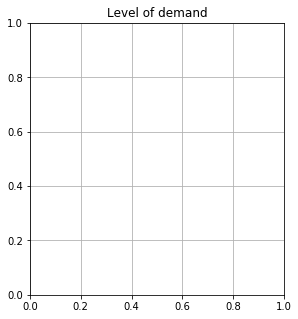

In [32]:


# Plot results
fig = plt.figure(figsize=(10,5))

ax_right = fig.add_subplot(1,2,2)
ax_right.set_title('Level of demand')
ax_right.grid(True)
ax_right.plot(p1_vec,totals);

**Question 3:** Find the Walras-equilibrium prices.

In [28]:
# d. excess demand functions
def excess_demand_good_1_func(betas,alphas,p1,p2,p3,e1,e2,e3):
    
    # a. demand
    demand = np.sum(demand_good_1(betas,alphas,p1,p2,p3,e1,e2,e3))
    
    # b. supply
    supply = np.sum(e1)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_2_func(betas,alphas,p1,p2,p3,e1,e2,e3):
    
    # a. demand
    demand = np.sum(demand_good_2(betas,alphas,p1,p2,p3,e1,e2,e3))
    
    # b. supply
    supply = np.sum(e2)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

In [31]:
# e. find equilibrium function
def find_equilibrium(betas,alphas,p1,p2,p3,e1,e2,e3,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        z1 = excess_demand_good_1_func(betas,alphas,p1,p2,p3,e1,e2,e3)
        z2 = excess_demand_good_2_func(betas,alphas,p1,p2,p3,e1,e2,e3)
        
        # b: step 2: stop?
        if  np.abs(z1) < eps and np.abs(z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*z1/N
        p1 = p2 + kappa*z2/N
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1,p2

# e. call find equilibrium function
p1 = 1.4
p2 = 1.4
p3 = 1
kappa = 0.1
eps = 1e-8
solution = find_equilibrium(betas,alphas,p1,p2,p3,e1,e2,e3,kappa=kappa,eps=eps)

ValueError: operands could not be broadcast together with shapes (50000,3) (50000,) 